# Stap 1; Include all the things!

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import pandas as pd
from prophet import Prophet

# Stap 2; get the data

In [56]:
# specify training data
#print(os.path.dirname(os.path.realpath(__file__)) + "/ods001.csv")
data = pd.read_csv("ods001.csv", sep = ';')

# Stap 3; Orient yourself in the data

                    DateTime Resolution code  Total Load
0  2022-01-10T23:45:00+01:00           PT15M         NaN
1  2022-01-10T23:30:00+01:00           PT15M         NaN
2  2022-01-10T23:15:00+01:00           PT15M         NaN
3  2022-01-10T23:00:00+01:00           PT15M         NaN
4  2022-01-10T22:45:00+01:00           PT15M         NaN
['DateTime', 'Resolution code', 'Total Load']
          Total Load
count  246370.000000
mean     9781.833286
std      1377.725456
min      6146.000000
25%      8696.812500
50%      9784.330000
75%     10803.107500
max     13815.370000


(array([  959., 13696., 33672., 42908., 42958., 47160., 37181., 19332.,
         7681.,   823.]),
 array([ 6146.   ,  6912.937,  7679.874,  8446.811,  9213.748,  9980.685,
        10747.622, 11514.559, 12281.496, 13048.433, 13815.37 ]),
 <BarContainer object of 10 artists>)

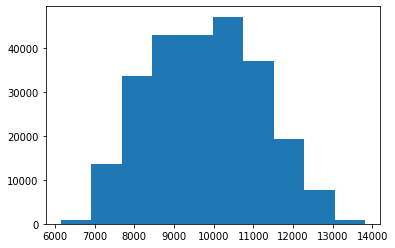

In [57]:
print(data.head()) #I know print not needed, but makes morphing into regular .py easy
print(data.columns.values.tolist())
print(data.describe())
data.dropna()
data = data.dropna()
plt.hist(data['Total Load'])

# Stap 4; Clean the data to the needed data for your model

In [58]:
data['DateTime'] = pd.to_datetime(data['DateTime'], utc=True).dt.tz_localize(None)
data.index = data['DateTime']
data['DateTime'] = data.resample('W', label='left').mean()
data = data.drop(['Resolution code'], axis = 1)
data = data.iloc[::-1]
data = data.dropna()

print(data.columns.values.tolist())
print(data.head(5))

#data['ds'] = data.index.dt.tz_localize(None)
data['ds'] = data.index
data = data.drop(['DateTime'], axis = 1)
#data.index.rename('index', inplace= True)
data = data.rename(columns = {'Total Load':'y'})

data.index = pd.RangeIndex(len(data.index))
data.index = range(len(data.index))

print(data.columns.values.tolist())
print(data.head(5))

['DateTime', 'Total Load']
                DateTime  Total Load
DateTime                            
2015-01-04  11394.531548     9643.33
2015-01-11  11310.602902     9859.44
2015-01-18  11736.661667    10085.38
2015-01-25  11406.563988    10349.52
2015-02-01  11701.288780    10257.45
['y', 'ds']
          y         ds
0   9643.33 2015-01-04
1   9859.44 2015-01-11
2  10085.38 2015-01-18
3  10349.52 2015-01-25
4  10257.45 2015-02-01


# Stap 5; Plot it, take a look at how it looks

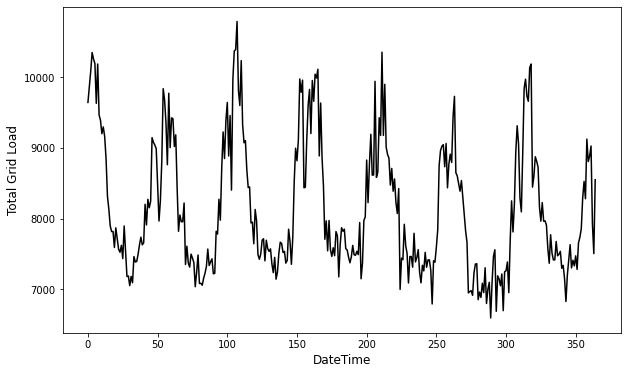

In [59]:
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Total Grid Load', {'fontsize': 12})
    
dataset = data.copy()
timeseries(data.index, dataset['y'], 'DateTime')

# Stap 6; Make the AI

In [60]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.75869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1063.07    0.00206313       188.325           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1063.59   0.000109449       58.2114   1.078e-06       0.001      220  LS failed, Hessian reset 
     199       1063.85   5.99131e-05        68.317      0.9437      0.9437      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       1063.93   7.01688e-06       96.7039   9.296e-08       0.001      453  LS failed, Hessian reset 
     299       1063.93   6.78415e-07       60.6451      0.1812           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       1063.93   4.80168e-08        55.087      0.2609           1      484   
Optimization terminat

## Stap 7 Do a prediction

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.75869
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1063.07    0.00206313       188.325           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1063.59   0.000109449       58.2114   1.078e-06       0.001      220  LS failed, Hessian reset 
     199       1063.85   5.99131e-05        68.317      0.9437      0.9437      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     295       1063.93   7.01688e-06       96.7039   9.296e-08       0.001      453  LS failed, Hessian reset 
     299       1063.93   6.78415e-07       60.6451      0.1812           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       1063.93   4.80168e-08        55.087      0.2609           1      484   
Optimization terminat

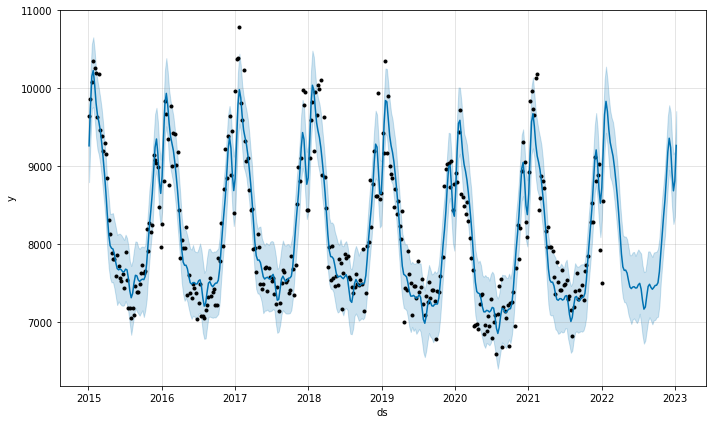

In [61]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=52, freq='W')
future.tail(5)
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5))
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))
fig1 = m.plot(forecast)

# Stap 8; Evaluate model a bit

In [62]:
se = np.square(forecast.loc[:, 'yhat'] - data['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

115970.60526656546
340.5445716298609
